In [95]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys

import copy
import csv
import datetime
import itertools
import numpy as np
import pandas as pd
import random
import re
import sklearn
import time
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context(rc={
       "figure.figsize": (16, 10),
       "axes.titlesize": 14})

from IPython.display import Image, display
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

from os.path import expanduser
sys.path.insert(1, '{}/datsci'.format(expanduser('~')))
from datsci import eda, munge, ml, ensemble
from datsci import kaggle as kg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
import santander

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import SGDClassifier as SGDClf
from sklearn.cross_validation import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer

import xgboost as xgb

In [104]:
fnames = !ls submissions.ensemble/ | sort -r | sed 's/^/submissions.ensemble\//'
fnames = fnames[:4]

In [105]:
print("\n".join(fnames))

submissions.ensemble/final.15.csv
submissions.ensemble/842629.testmmm.csv
submissions.ensemble/842629.first.csv
submissions.ensemble/842629.alpy111.csv


In [106]:
y_hats = pd.DataFrame([pd.read_csv(f, index_col='ID', squeeze=True).rename(f) for f in fnames]).T

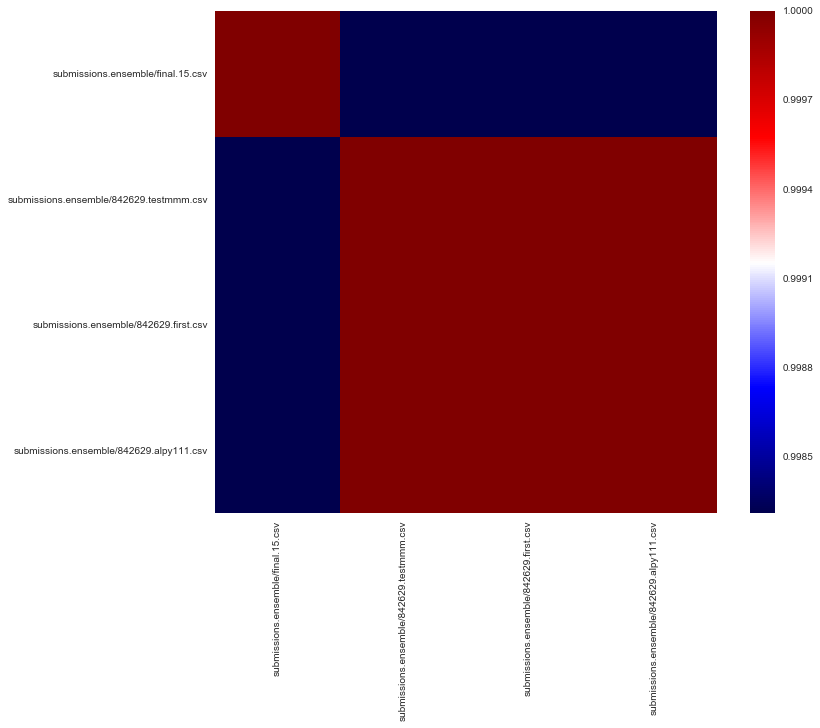

In [107]:
corr = eda.corr_heat(y_hats)

In [22]:
# High Score 0.842309
y_hat_avg = kg.weighted_avg_from_files(
    [
        'submissions.ensemble/842316.to_the_top_v3.csv',
        'submissions.ensemble/842296.getting_into_r_revolution_action.csv'
    ],
    "submissions/final.1.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [33]:
# High Score 0.842316
y_hat_avg = kg.weighted_avg_from_files(
    [
        'submissions.ensemble/842316.to_the_top_v3.csv',
        'submissions.ensemble/842316.getting_into_r_revolution_action.csv'
    ],
    "submissions/final.2.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [34]:
# LB Score 0.842311
y_hat_avg = kg.weighted_avg_from_files(
    [
        'submissions.ensemble/842316.to_the_top_v3.csv',
        'submissions.ensemble/842302.gogogo.csv'
    ],
    "submissions/final.3.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [35]:
# Score 0.842311
y_hat_avg = kg.weighted_avg_from_files(
    [
        'submissions.ensemble/842302.gogogo.csv',
        'submissions.ensemble/842316.getting_into_r_revolution_action.csv'
    ],
    "submissions/final.4.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [9]:
# Score 0.842347
y_hat_avg = kg.weighted_avg_from_files(
    [
        'submissions.ensemble/842365.getting_into_r_revolution_action.csv',
        'submissions.ensemble/842328.to_the_top.csv',
    ],
    "submissions/final.5.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [10]:
# Score 0.842343
y_hat_avg = kg.weighted_avg_from_files(
    [
        'submissions.ensemble/842365.getting_into_r_revolution_action.csv',
        'submissions.ensemble/842316.to_the_top_v3.csv',
    ],
    "submissions/final.6.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [73]:
# Score 0.842463
f1 = 'submissions.ensemble/842475.nonum4script.csv'
f2 = 'submissions.ensemble/842453.overfit1.csv'
out = "submissions.ensemble/final.10.csv"

y_hat_avg = kg.weighted_avg_from_files(
    [f1, f2],
    out,
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [74]:
# Score 0.842463
f1 = 'submissions.ensemble/842475.nonum4script.csv'
f2 = 'submissions.ensemble/842440.revolve.csv'
out = "submissions.ensemble/final.11.csv"

y_hat_avg = kg.weighted_avg_from_files(
    [f1, f2],
    out,
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [94]:
# Score 0.842417
f1 = 'submissions.ensemble/842453.overfit1.csv'
f2 = 'submissions.ensemble/842365.xml123.csv'
out = "submissions.ensemble/final.14.csv"

y_hat_avg = kg.weighted_avg_from_files(
    [f1, f2],
    out,
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [103]:
# Score 0.842561
f1 = 'submissions.ensemble/842629.testmmm.csv'
f2 = 'submissions.ensemble/842475.final.13.csv'
out = "submissions.ensemble/final.15.csv"

y_hat_avg = kg.weighted_avg_from_files(
    [f1, f2],
    out,
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [108]:
# Score 0.842629
f1 = 'submissions.ensemble/842629.testmmm.csv'
f2 = 'submissions.ensemble/842629.first.csv'
out = "submissions.ensemble/final.16.csv"

y_hat_avg = kg.weighted_avg_from_files(
    [f1, f2],
    out,
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [122]:
# LB Score 0.842629
f1 = 'submissions.ensemble/842629.testmmm.csv'
f2 = 'submissions.ensemble/842629.first.csv'
out = "submissions.ensemble/final.17.csv"

y_old1 = pd.read_csv(f1, index_col='ID', squeeze=True)
y_old2 = pd.read_csv(f2, index_col='ID', squeeze=True)
y_hat = list(map(lambda x_y: min(x_y) if x_y[0] < 0.5 else max(x_y), zip(y_old1.values, y_old2.values)))
kg.save_submission(y_hat,
                   out,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

In [123]:
# LB Score 0.837779
out = "submissions.ensemble/final.18.csv"

fnames = !ls submissions.ensemble/ | sort -r | sed 's/^/submissions.ensemble\//'
all_fs = [pd.read_csv(f, index_col='ID', squeeze=True) for f in fnames]
y_hat = list(map(lambda x_y: min(x_y) if x_y[0] < 0.5 else max(x_y), zip(*all_fs)))
kg.save_submission(y_hat,
                   out,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

In [125]:
# All median
# Score 0.842301

out = "submissions.ensemble/final.19.csv"
fnames = !ls submissions.ensemble/ | sort -r | sed 's/^/submissions.ensemble\//'
all_fs = [pd.read_csv(f, index_col='ID', squeeze=True).values for f in fnames]

y_hat = list(map(np.median, zip(*all_fs)))
kg.save_submission(y_hat,
                   out,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

### Make extreme values extremer

In [53]:
# LB Score 0.839313

new_submission = 'submissions.ensemble/final.7.csv'
f = 'submissions.ensemble/842365.getting_into_r_revolution_action.csv'
y_old = pd.read_csv(f, index_col='ID', squeeze=True)
y_hat = y_old.apply(lambda v: 0 if v < 0.01 else v)
print(y_hat.equals(y_old))
kg.save_submission(y_hat,
                   new_submission,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

False


In [58]:
# LB Score 0.842301

new_submission = 'submissions.ensemble/final.8.csv'
f = 'submissions.ensemble/842365.getting_into_r_revolution_action.csv'
y_old = pd.read_csv(f, index_col='ID', squeeze=True)
y_hat = y_old.apply(lambda v: 0 if v < 0.003 else v)
print(y_hat.equals(y_old))
kg.save_submission(y_hat,
                   new_submission,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

False


In [ ]:
# LB Score 

new_submission = 'submissions.ensemble/final.9.csv'
f = 'submissions.ensemble/842365.getting_into_r_revolution_action.csv'
y_old = pd.read_csv(f, index_col='ID', squeeze=True)
y_hat = y_old.apply(lambda v: 0 if v < 0.003 else v)
print(y_hat.equals(y_old))
kg.save_submission(y_hat,
                   new_submission,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

In [48]:
y_old.describe()

count    75818.000000
mean         0.038193
std          0.060245
min          0.000000
25%          0.005070
50%          0.014656
75%          0.037280
max          0.840372
Name: TARGET, dtype: float64

In [52]:
(y_old > 0.5).sum()

26

In [59]:
(y_hat != y_old).sum()

7068

## Extreme high values

In [82]:
# LB Score 0.842475

new_submission = 'submissions.ensemble/final.12.csv'
f = 'submissions.ensemble/842475.nonum4script.csv'
y_old = pd.read_csv(f, index_col='ID', squeeze=True)
y_hat = y_old.apply(lambda v: 1.0 if v > 0.6 else v)
kg.save_submission(y_hat,
                   new_submission,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

In [87]:
(y_old > 0.55).sum()

19

In [83]:
(y_old != y_hat).sum()

14

In [88]:
# LB Score 0.842475

new_submission = 'submissions.ensemble/final.13.csv'
f = 'submissions.ensemble/842475.nonum4script.csv'
y_old = pd.read_csv(f, index_col='ID', squeeze=True)
y_hat = y_old.apply(lambda v: 1.0 if v > 0.5 else v)
kg.save_submission(y_hat,
                   new_submission,
                   sample_submission_file=santander.FILE_SAMPLE_SUBMIT)

In [85]:
y_old[(y_old != y_hat)]

ID
7976      0.688631
11665     0.606459
15325     0.830953
17915     0.840372
30650     0.722885
38952     0.656466
46848     0.668137
69462     0.761152
101918    0.730942
102895    0.689931
116631    0.766317
123370    0.634025
134971    0.650772
137540    0.654835
Name: TARGET, dtype: float64

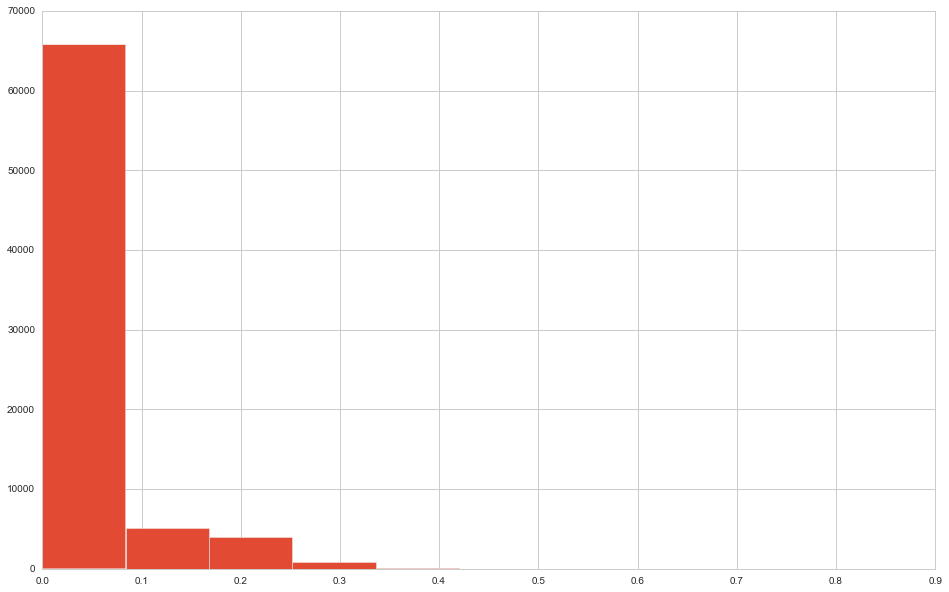

In [92]:
y_old.sort_values().hist()